In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv("C:\\CS\\ML_lab\\data\\amazon_alexa.tsv", delimiter = '\t')
df.head()

,rating,date,variation,verified_reviews,feedback
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1
4,5,31-Jul-18,Charcoal Fabric,Music,1


<h3>Finding null values</h3>

In [16]:
df.isnull().sum()

rating              0
date                0
variation           0
verified_reviews    1
feedback            0
dtype: int64

In [22]:
#getting the null record:
df[df['verified_reviews'].isna() == True]

,rating,date,variation,verified_reviews,feedback
473,2,29-Jun-18,White,NaN,0


In [26]:
df.dropna(inplace = True) #inplace as it will delete from same object instead of creating new object

In [28]:
df.isnull().sum()

rating              0
date                0
variation           0
verified_reviews    0
feedback            0
dtype: int64

In [30]:
#adding new column containg the lenght of the verfied records:
df['length'] = df['verified_reviews'].apply(len)
df.head()

,rating,date,variation,verified_reviews,feedback,length
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1,13
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1,9
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1,195
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1,172
4,5,31-Jul-18,Charcoal Fabric,Music,1,5


<h3>Columns and their data types:</h3>

In [31]:
df.dtypes

rating               int64
date                object
variation           object
verified_reviews    object
feedback             int64
length               int64
dtype: object

object here refers to string


<h3>Analyzing rating column</h3>

In [53]:
df['rating'].value_counts().sort_index()

rating
1     161
2      95
3     152
4     455
5    2286
Name: count, dtype: int64

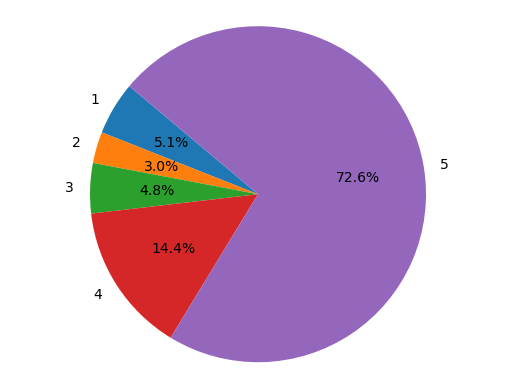

In [54]:
labels = [1, 2, 3, 4, 5]
sizes = []
for i in df['rating'].value_counts().sort_index():
    sizes.append((i/len(df))*100)
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
plt.axis('equal')
plt.show()

<h3>Analyzing feedback column</h3>

In [55]:
df['feedback'].value_counts().sort_index()

feedback
0     256
1    2893
Name: count, dtype: int64

In [57]:
df[df['feedback'] == 0]['rating'].value_counts().sort_index()

rating
1    161
2     95
Name: count, dtype: int64

In [58]:
df[df['feedback'] == 1]['rating'].value_counts().sort_index()

rating
3     152
4     455
5    2286
Name: count, dtype: int64

<p>The feedback column has two values, 1 and 0. All the products with a rating of 1 and 2 are classified into 0, and the ones with rating 3 and higher are classified into 1.</p>

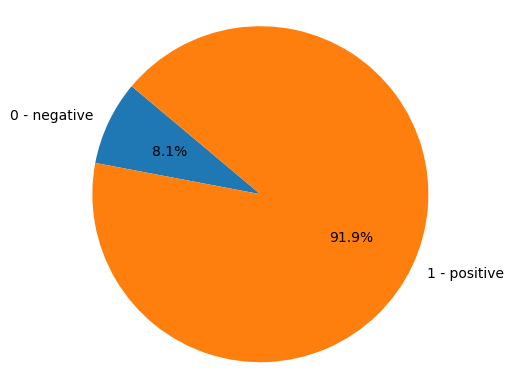

In [60]:
labels = ["0 - negative", "1 - positive"]
sizes = []
for i in df['feedback'].value_counts().sort_index():
    sizes.append((i/len(df))*100)
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
plt.axis('equal')
plt.show()

<h3>Analyzing variation column</h3>

In [75]:
df["variation"].value_counts()

variation
Black  Dot                      516
Charcoal Fabric                 430
Configuration: Fire TV Stick    350
Black  Plus                     270
Black  Show                     265
Black                           261
Black  Spot                     241
White  Dot                      184
Heather Gray Fabric             157
White  Spot                     109
Sandstone Fabric                 90
White                            90
White  Show                      85
White  Plus                      78
Oak Finish                       14
Walnut Finish                     9
Name: count, dtype: int64

In [80]:
#percentage split
df["variation"].value_counts()/len(df)*100

variation
Black  Dot                      16.386154
Charcoal Fabric                 13.655129
Configuration: Fire TV Stick    11.114640
Black  Plus                      8.574151
Black  Show                      8.415370
Black                            8.288346
Black  Spot                      7.653223
White  Dot                       5.843125
Heather Gray Fabric              4.985710
White  Spot                      3.461416
Sandstone Fabric                 2.858050
White                            2.858050
White  Show                      2.699270
White  Plus                      2.476977
Oak Finish                       0.444586
Walnut Finish                    0.285805
Name: count, dtype: float64

In [82]:
df.groupby('variation')['rating'].mean()

variation
Black                           4.233716
Black  Dot                      4.453488
Black  Plus                     4.370370
Black  Show                     4.490566
Black  Spot                     4.311203
Charcoal Fabric                 4.730233
Configuration: Fire TV Stick    4.591429
Heather Gray Fabric             4.694268
Oak Finish                      4.857143
Sandstone Fabric                4.355556
Walnut Finish                   4.888889
White                           4.166667
White  Dot                      4.423913
White  Plus                     4.358974
White  Show                     4.282353
White  Spot                     4.311927
Name: rating, dtype: float64

Text(0.5, 1.0, 'mean rating vs variation')

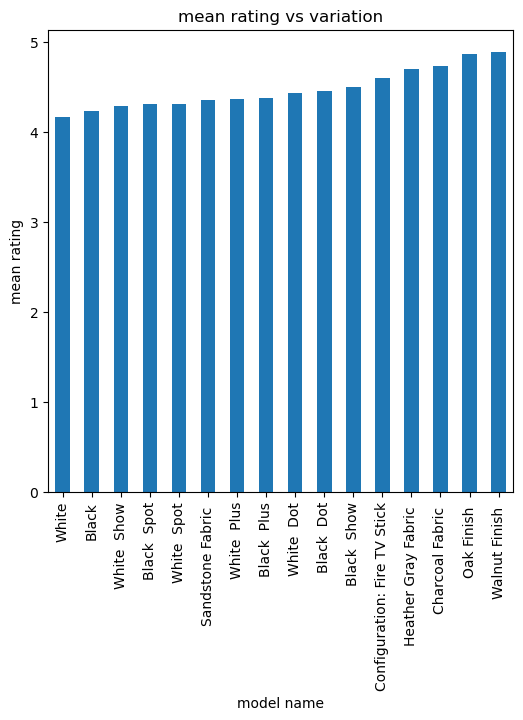

In [88]:
df.groupby('variation')['rating'].mean().sort_values().plot.bar(figsize  = (6, 6))
plt.xlabel("model name")
plt.ylabel("mean rating")
plt.title("mean rating vs variation")